In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('vehiculos-de-segunda-mano-sample.csv')
df_provincia = pd.read_csv('Coches010923Completo.csv')

## EDA

#Echamos un vistazo a nuestro dataframe

In [3]:
df.head()

,vehicle_type,make,model,version,fuel,year,kms,power,doors,shift,...,dealer_name,dealer_description,dealer_address,dealer_zip_code,dealer_city,dealer_country_code,dealer_is_professional,dealer_website,dealer_registered_at,date
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,NaN,manual,...,Sergio Y.,NaN,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,Pineda de Mar,ES,True,www.cocheauto.com,2017-01-18,2023-02-06
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,NaN,manual,...,Peugeot Alcala 534,Concesionario Oficial Peugeot Alcalá 534. Disp...,"Avenida de José Gárate, Coslada, Área metropol...",28823.0,Coslada,ES,True,www.alcala534.com/es/vehiculos-ocasion,2019-02-15,2023-02-06
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,NaN,automatic,...,Clicars S.,Nº1 en Europa en venta de coches online. \nYa ...,"San Cristóbal, Avenida de Andalucía, San Crist...",28021.0,Madrid,ES,True,www.clicars.com/,2016-05-09,2023-02-06
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,NaN,manual,...,Vallescar S.,"¿QUIERES UN VEHÍCULO HECHO A TU MEDIDA, CON LA...","Parc de Bombers de Sabadell, 52, Carretera de ...",8200.0,Sabadell,ES,True,https://www.vallescarocasion.es/,2019-09-30,2023-02-06
4,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,NaN,manual,...,Vallescar Ocasion M.,"¿QUIERES UN VEHÍCULO HECHO A TU MEDIDA, CON LA...","27, Carrer de Fèlix Ferran, Mollet del Vallès,...",8100.0,Mollet del Vallès,ES,True,https://www.vallescarocasion.es/,2017-04-19,2023-02-06


Obtenemos el numero de valores únicos por cada columna

In [4]:
df.nunique()

vehicle_type                 1
make                        66
model                      748
version                   8658
fuel                         4
year                        43
kms                       6643
power                      349
doors                        0
shift                        2
color                        0
photos                      10
description               6439
price                     2665
currency                     1
location                   669
publish_date               424
update_date                 38
dealer_name               1678
dealer_description        1181
dealer_address            1675
dealer_zip_code            872
dealer_city                665
dealer_country_code          1
dealer_is_professional       1
dealer_website             888
dealer_registered_at      1177
date                        13
dtype: int64

Obtenemos la suma del numero de valores nulos por cada columna

In [5]:
df.isna().sum()

vehicle_type                   0
make                           0
model                          0
version                      158
fuel                        3190
year                           0
kms                          811
power                        291
doors                     100000
shift                       1018
color                     100000
photos                         0
description                44190
price                          0
currency                       0
location                       0
publish_date                   0
update_date                    0
dealer_name                   92
dealer_description         18442
dealer_address                92
dealer_zip_code               92
dealer_city                   92
dealer_country_code            0
dealer_is_professional         0
dealer_website             20087
dealer_registered_at          92
date                           0
dtype: int64

Inspeccionamos las columnas de localidades y provincias

In [6]:
df_provincia.head()

,make,model,fuel,kms,power,shift,price,location,codigopostalid,provincia,poblacion
0,Opel,Crossland,Gasolina,5.0,110.0,manual,22900,Pineda de Mar,8397,Barcelona,Pineda de Mar
1,Opel,Crossland,Gasolina,24847.0,110.0,manual,19990,Coslada,28823,Madrid,Coslada
2,Opel,Crossland,Diésel,41356.0,120.0,automatic,18590,Madrid,28021,Madrid,Madrid
3,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Sabadell,8201,Barcelona,Sabadell
4,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Mollet del Vallès,8100,Barcelona,Mollet del Vallès


In [7]:
df.location.value_counts()

location
Madrid                                 5135
Barcelona                              4488
Vigo                                   3519
Sevilla                                3411
Murcia                                 3358
                                       ... 
Baeza                                     1
Foz                                       1
Residencia Nuestra Señora del Pilar       1
Orio                                      1
El Saucejo                                1
Name: count, Length: 669, dtype: int64

Conclusion tras ver duplicados, nulos, etc, quitamos las siguientes columnas:

In [8]:
df = df.drop(['vehicle_type','dealer_country_code','dealer_is_professional','color','description','currency','dealer_zip_code','dealer_address','doors','dealer_description','update_date','dealer_registered_at','date','version','dealer_website','photos','dealer_name','dealer_city','publish_date'], axis = 1)

Ahora quitamos duplicados:

In [9]:
df.shape

(100000, 9)

In [10]:
df = df.drop_duplicates()

Descubrimos que prácticamente la mitad de nuestro dataframe son duplicados:

In [11]:
df.shape

(41764, 9)

Quitamos los nulos

In [12]:
df = df.dropna()
df.shape

(39648, 9)

In [13]:
##TRAER CODIGO USADO PARA TENER PROVINCIAS 

Unimos los dos Data Frame

In [14]:
loc2cp = df_provincia[['location','codigopostalid']].set_index('location').to_dict()['codigopostalid']
loc2provincia = df_provincia[['location','provincia']].set_index('location').to_dict()['provincia']

In [15]:
df['cp'] = df.location.map(loc2cp)
df['provincia'] = df.location.map(loc2provincia)

In [16]:
df['provincia'].isna().sum()

1452

In [17]:
df.isna().sum()

make            0
model           0
fuel            0
year            0
kms             0
power           0
shift           0
price           0
location        0
cp           1452
provincia    1452
dtype: int64

Volvemos a quitar duplicados y vemos la forma final

In [18]:
df = df.dropna()
df.shape

(38196, 11)

Creamos columna antiguedad

In [19]:
#Explicar el porque 2023

In [20]:
df['antiguedad'] = (2023 - df['year'])
df = df.drop(['year'], axis = 1)
df

,make,model,fuel,kms,power,shift,price,location,cp,provincia,antiguedad
0,Opel,Crossland,Gasolina,5.0,110.0,manual,22900,Pineda de Mar,8397.0,Barcelona,1
1,Opel,Crossland,Gasolina,24847.0,110.0,manual,19990,Coslada,28823.0,Madrid,1
2,Opel,Crossland,Diésel,41356.0,120.0,automatic,18590,Madrid,28014.0,Madrid,2
3,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Sabadell,8203.0,Barcelona,1
4,Opel,Crossland,Gasolina,11.0,110.0,manual,22700,Mollet del Vallès,8100.0,Barcelona,1
...,...,...,...,...,...,...,...,...,...,...,...
99990,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,13310,Granollers,8403.0,Barcelona,8
99992,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,13310,Estepona,29680.0,Málaga,8
99994,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,13310,Saladar,3700.0,Alicante,8
99996,Citroen,C4 Picasso,Diésel,173035.0,111.0,automatic,9290,Valencia,46002.0,Valencia,10


Hacemos un plot mostrando las distintas features

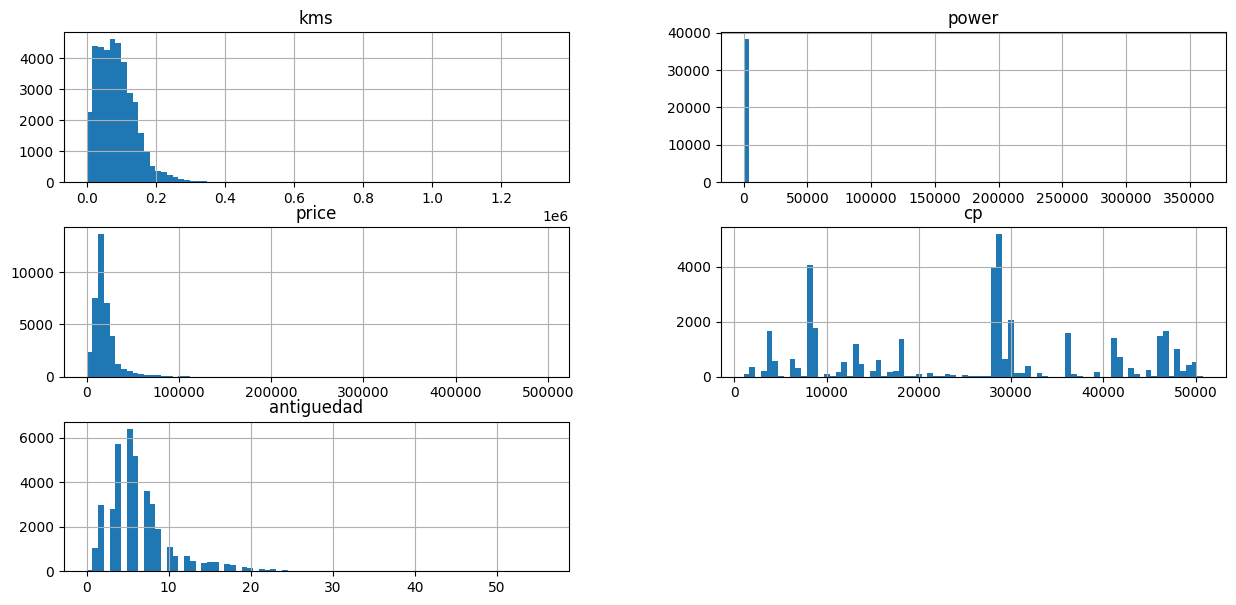

In [21]:
df.hist(figsize=(15, 7), bins=80)
plt.show()

#### Examinamos la distribución de datos precio 

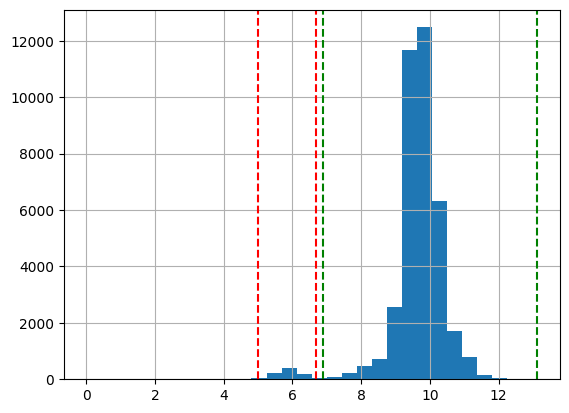

In [22]:
np.log(df.price + 1).hist(bins = 30)
plt.axvline(x=6.9, color='g', linestyle='--')
plt.axvline(x=13.12, color='g', linestyle='--')
plt.axvline(x=6.7, color='r', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')


###### LEYENDA, TITULOS, EJES, CON DATOS: INTERPRETABLE

Al realizar la distribución logarítmica del precio descubrimos dos agrupaciones en nuestra distribución, gracias a nuestro análisis anterior sabemos que la agrupacion de la izquierda es consecuencia de precios inusualmente bajos en relación al precio de venta de un coche de segunda mano habitual, concluimos que los coches dentro de este ranfgo de precio se destinan a la venta para piezas y desguace. Por ello encontramos pertinente aislarla del conjunto de datos usado en el análisis. 

Los puntos que usamos para separar estas agrupaciones coinciden los límites de la agrupación, con un valor de:

In [23]:
print(np.exp(6.9),np.exp(13.12))

992.2747156050262 498819.7065866096


#### Escalamos logaritmicamente la distribución de los precios 

In [24]:
df_escalado = df.copy() 


In [25]:
df_escalado['precio_escalado'] = np.log(df_escalado['price'])
df_escalado = df_escalado.drop(['price'], axis =1)

C:\Users\Oscar\miniconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
print(df_escalado)

          make       model      fuel       kms  power      shift  \
0         Opel   Crossland  Gasolina       5.0  110.0     manual   
1         Opel   Crossland  Gasolina   24847.0  110.0     manual   
2         Opel   Crossland    Diésel   41356.0  120.0  automatic   
3         Opel   Crossland  Gasolina      11.0  110.0     manual   
4         Opel   Crossland  Gasolina      11.0  110.0     manual   
...        ...         ...       ...       ...    ...        ...   
99990  Citroen  C4 Picasso    Diésel  148527.0  150.0     manual   
99992  Citroen  C4 Picasso    Diésel  148527.0  150.0     manual   
99994  Citroen  C4 Picasso    Diésel  148527.0  150.0     manual   
99996  Citroen  C4 Picasso    Diésel  173035.0  111.0  automatic   
99998  Citroen  C4 Picasso    Diésel  178131.0  110.0     manual   

                location       cp  provincia  antiguedad  precio_escalado  
0          Pineda de Mar   8397.0  Barcelona           1        10.038892  
1                Coslada  28823

#### Seleccionamos el conjunto acotado 

In [27]:
df_acotado = df_escalado[(df_escalado['precio_escalado'] < 13.12) & (df_escalado['precio_escalado'] > 6.9)]

df_acotado

,make,model,fuel,kms,power,shift,location,cp,provincia,antiguedad,precio_escalado
0,Opel,Crossland,Gasolina,5.0,110.0,manual,Pineda de Mar,8397.0,Barcelona,1,10.038892
1,Opel,Crossland,Gasolina,24847.0,110.0,manual,Coslada,28823.0,Madrid,1,9.902987
2,Opel,Crossland,Diésel,41356.0,120.0,automatic,Madrid,28014.0,Madrid,2,9.830379
3,Opel,Crossland,Gasolina,11.0,110.0,manual,Sabadell,8203.0,Barcelona,1,10.030120
4,Opel,Crossland,Gasolina,11.0,110.0,manual,Mollet del Vallès,8100.0,Barcelona,1,10.030120
...,...,...,...,...,...,...,...,...,...,...,...
99990,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,Granollers,8403.0,Barcelona,8,9.496271
99992,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,Estepona,29680.0,Málaga,8,9.496271
99994,Citroen,C4 Picasso,Diésel,148527.0,150.0,manual,Saladar,3700.0,Alicante,8,9.496271
99996,Citroen,C4 Picasso,Diésel,173035.0,111.0,automatic,Valencia,46002.0,Valencia,10,9.136694


#### Introducimos valores numericos como etiquetas

In [28]:
df_acotado.fuel.nunique()

4

In [29]:
df_acotado["shift"] = df_acotado["shift"].replace({'manual': 1, 'automatic': 0})
df_acotado["fuel"] = df_acotado["fuel"].replace({'Gasolina': 0, 'Diésel': 1, 'Eléctrico': 2, 'Otros': 3})

C:\Users\Oscar\AppData\Local\Temp\ipykernel_10552\288593387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acotado["shift"] = df_acotado["shift"].replace({'manual': 1, 'automatic': 0})
C:\Users\Oscar\AppData\Local\Temp\ipykernel_10552\288593387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acotado["fuel"] = df_acotado["fuel"].replace({'Gasolina': 0, 'Diésel': 1, 'Eléctrico': 2, 'Otros': 3})


#### Hacemos una tabla de correlación  

In [30]:
corr = df_acotado.drop(['make', 'model', 'location', 'provincia'], axis =1).corr()
corr.style.background_gradient(cmap='Greens').format(precision=3)

,fuel,kms,power,shift,cp,antiguedad,precio_escalado
fuel,1.000,0.198,-0.004,-0.172,0.018,-0.003,0.111
kms,0.198,1.000,0.015,0.007,0.027,0.599,-0.439
power,-0.004,0.015,1.000,-0.029,-0.008,0.024,0.016
shift,-0.172,0.007,-0.029,1.000,0.002,0.044,-0.480
cp,0.018,0.027,-0.008,0.002,1.000,0.001,-0.022
antiguedad,-0.003,0.599,0.024,0.044,0.001,1.000,-0.537
precio_escalado,0.111,-0.439,0.016,-0.480,-0.022,-0.537,1.000


Concluimos que power tiene poca correlacion con el target (precio) y ademas tiene una distribucion muy limitada. 
Por eso lo quitamos de nuestro dataset. 

A tomar en cuenta:

Al jugar con los datos nos hemos dado cuenta de que coinciden anuncios de coches en los que solo cambia 
la locacalización, es decir, son duplicados. Por ello, eliminamos la columna y hacemos drop.duplicate().

In [31]:
df_acotado  = df_acotado[['make','fuel','kms','shift','antiguedad', 'precio_escalado']]

In [33]:
df_acotado = df_acotado.drop_duplicates()

Descubrimos que hay anuncios duplicados en varias provincias distintas, por lo que quitamos duplicados tras quitar las columnas correspondientes. Así que el df pasa a tener 11656 registros:

In [34]:
df_acotado.shape

(11656, 6)

####  Vemos que resultados ha producido nuestro modelado

Para ello hemos decido realizar un boxplot que nos permita ver la distribución del precio.

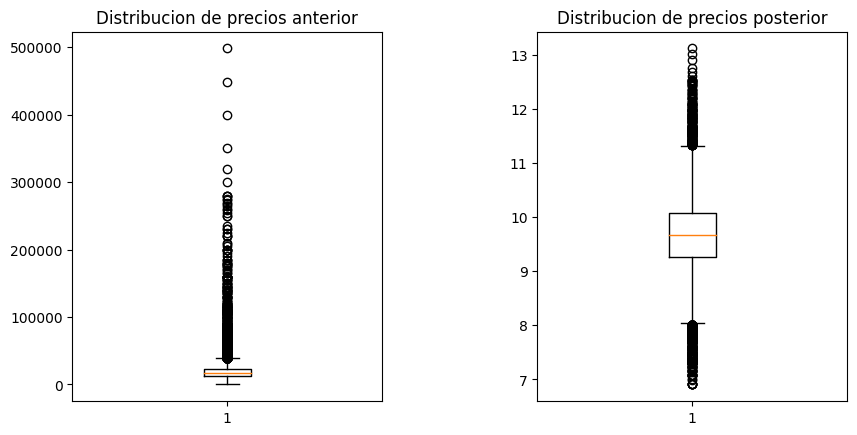

In [35]:
fig, (ax2, ax1) = plt.subplots(1, 2)

z = df_acotado.precio_escalado

ax2.boxplot(df.price)
ax1.boxplot(z)
ax2.set_title('Distribucion de precios anterior')
ax1.set_title('Distribucion de precios posterior')
fig.subplots_adjust(wspace=0.5)
fig.set_figwidth(10)




Podemos ver que tras nuestra acotación y la transformación a escala logarítmica, la distrubución será mas eficiente para nuestro
modelo. 

In [36]:
df_acotado.precio_escalado

0        10.038892
1         9.902987
2         9.830379
3        10.030120
5         9.809177
           ...    
99931     9.809177
99947     9.366489
99948     9.487896
99996     9.136694
99998     8.980927
Name: precio_escalado, Length: 11656, dtype: float64

Además hemos escogido un diagrama de violín con el objetivo de tener otra perspectiva:

Text(0.5, 1.0, 'Distribución del precio')

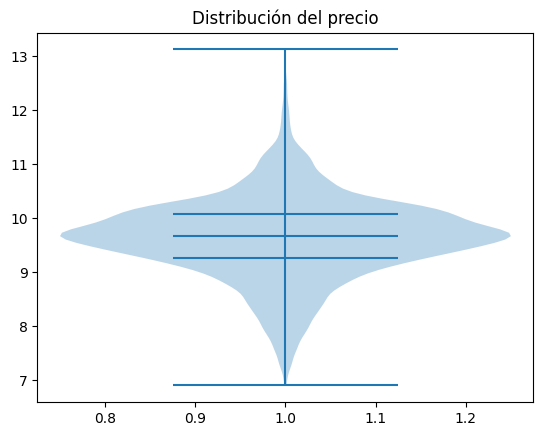

In [37]:
plt.violinplot(df_acotado['precio_escalado'], quantiles = [0.25, 0.5, 0.75])
plt.title('Distribución del precio')

Podemos apreciar que nuestra distribución recae sobre los caurtiles medios, algo típico de una distribución normal. 

In [38]:
df_acotado.head()

,make,fuel,kms,shift,antiguedad,precio_escalado
0,Opel,0,5.0,1,1,10.038892
1,Opel,0,24847.0,1,1,9.902987
2,Opel,1,41356.0,0,2,9.830379
3,Opel,0,11.0,1,1,10.030120
5,Opel,0,51390.0,1,2,9.809177


#### Hacemos un cluster de los datos para tener perspectiva de la distribución

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA

In [40]:
df_acotado.head()

,make,fuel,kms,shift,antiguedad,precio_escalado
0,Opel,0,5.0,1,1,10.038892
1,Opel,0,24847.0,1,1,9.902987
2,Opel,1,41356.0,0,2,9.830379
3,Opel,0,11.0,1,1,10.030120
5,Opel,0,51390.0,1,2,9.809177


In [43]:
df_acotado_one_hot = pd.get_dummies(df_acotado[['make','fuel','kms','precio_escalado','antiguedad','shift']], dtype=int)

In [47]:
df_acotado_one_hot.shape

(11656, 72)

In [ ]:
#Ponerrrrr seleccion del numero de cluster 

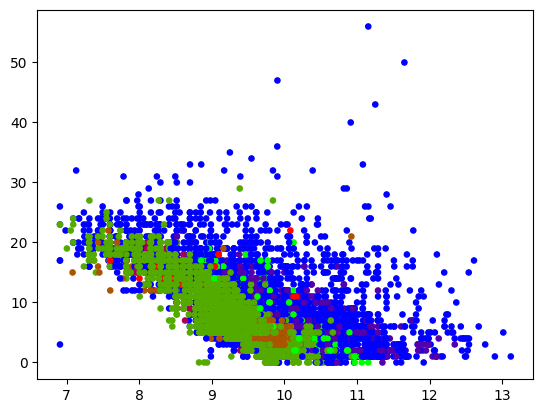

In [45]:
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

np_aux2 = StandardScaler().fit_transform(df_acotado_one_hot)

hdb = HDBSCAN(min_cluster_size=530).fit(np_aux2)


df_acotado_one_hot['hdb_labels'] = hdb.labels_

plt.scatter(df_acotado_one_hot['precio_escalado'],
                df_acotado_one_hot['antiguedad'],
                c=df_acotado_one_hot['hdb_labels'],
                cmap='brg',
                s=14)

Conclusión: 

- Se puede apreciar un grupo de vehiculos con menor varianza,  y menor antiguedad media (verde).
    
- Además podemos ver valores atípicos como un coche con más  de 50 años y con un valor bastante alto que ha reslutado ser un porche 911 (azul).

In [ ]:
df_acotado[df_acotado.antiguedad > 50]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler

In [ ]:

'''''
df_acotado_para_modelo = pd.get_dummies(df_acotado)

df_acotado_para_modelo_escalado = StandardScaler().fit_transform(df_acotado_para_modelo)

plt.figure(figsize=(14, 14))

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(df_acotado_para_modelo_escalado)
    df_acotado_para_modelo_escalado['kmeans_labels'] = kmeans.labels_  
    plt.subplot(2,2,k-1)  
    plt.scatter(df_acotado_para_modelo_escalado['precio_normalizado'],
                df_acotado_para_modelo_escalado['antiguedad'],
                c=df_acotado_para_modelo_escalado['kmeans_labels'],
                cmap='brg',
                s=14)
    plt.title(f'K = {k}')
    plt.xlabel('precio_normalizado')
    plt.ylabel('Antiguedad')'''''

## Modelo Machine Learning


In [ ]:
##### SEPARAR LAS VARIABLES FUEL Y SHIFT ANTES DE HACEER EL SCALER PARA NO METER RUDIO Y UNIRLAS DESPUES 
### OPTATIVO 

In [48]:
#Dummies

df_hot_encoded = pd.get_dummies(df, dtype=int)
df_hot_encoded = df_hot_encoded.drop(['kms'],axis=1)
df_hot_encoded.shape

(38196, 1495)

In [49]:
#Split X e Y

X = df_hot_encoded.drop(["price"], axis=1)
y = df_hot_encoded.price

In [50]:
#Split train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [51]:
#Entrenamos modelo regresivo

from xgboost import XGBRegressor 
clf = XGBRegressor()
clf.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
#Realizamos prediccion

y_pred = clf.predict(X_test)

In [53]:
#Metricas modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mae

2502.680873681493

In [54]:
import streamlit as st 
import pickle
import joblib

In [55]:
#save the model to disk pickle
model = clf 

modelo_exp_pickle = 'modelo_exp_pickle.sav'
pickle.dump(model, open(modelo_exp_pickle, 'wb'))

In [56]:
#save the model to disk joblib
modelo_exp_joblib = 'modelo_exp_joblib.sav'
joblib.dump(model, modelo_exp_joblib)

['modelo_exp_joblib.sav']

In [ ]:
#### hacemos un loop y entrenamos varios modelos usando distintos grupos(por ejemplo comunidades autónomas)

In [ ]:
y.min()

In [ ]:
y.max()

In [ ]:
np.median(y)

In [ ]:
df_aux

In [ ]:
import folium
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="example")

m = folium.Map(location=[location.latitude, location.longitude], zoom_start=6)

for index, row in df_aux.iterrows():
    location = geolocator.geocode(row['location'])
    folium.Marker([location.latitude, location.longitude], popup=row['make']).add_to(m)

m.save('map.html')